<a href="https://colab.research.google.com/github/RohitJangid9983/EMPLOYEE-DATASET/blob/main/Employee_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***EMPLOYEE DATASET***

# ***⭐Install Librarys***

In [99]:
!pip install summarytools

# ***⭐Import All Libraries***

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import summarytools as st
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## ***⚡upload dataset***

In [101]:
df =pd.read_csv("/content/Employee data.zip")

In [102]:
# Display first few rows
df.head()

,Index,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,Sara,Mcguire,Female,tsharp@example.net,(971)643-6089x9160,17-08-21,"Editor, commissioning"
1,2,Alisha,Hebert,Male,vincentgarrett@example.net,+1-114-355-1841x78347,28-06-69,Broadcast engineer
2,3,Gwendolyn,Sheppard,Male,mercadojonathan@example.com,9017807728,25-09-15,Industrial buyer
3,4,Kristine,Mccann,Female,lindsay55@example.com,+1-607-333-9911x59088,27-07-78,Multimedia specialist
4,5,Bobby,Pittman,Female,blevinsmorgan@example.com,3739847538,17-11-89,Planning and development surveyor


In [103]:
# Display last few rows
df.tail()

,Index,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
9995,9996,Tina,Sherman,Male,bartlettcolleen@example.org,(455)476-4044x5755,28-07-74,"Scientist, physiological"
9996,9997,Earl,Jennings,Female,andreabenton@example.com,009.056.6505,20-08-32,Warehouse manager
9997,9998,Ellen,Dominguez,Female,michaelayoder@example.net,409-428-4297x469,06-06-66,Lawyer
9998,9999,Emma,Clark,Male,pstrickland@example.com,849-868-8653,09-05-07,Accounting technician
9999,10000,Katrina,Schwartz,Female,andres56@example.org,001-874-330-5546x16770,14-08-35,Drilling engineer


## ***⚡Number of rows and columns***

In [104]:
df.shape

(10000, 8)

In [105]:
#print the row number and columns number
print("Number of Rows", df.shape[0])
print("Number of Columns", df.shape[1])

Number of Rows 10000
Number of Columns 8


## ***⚡Show The Columns Name***

In [106]:
df.columns

Index(['Index', 'First Name', 'Last Name', 'Sex', 'Email', 'Phone',
       'Date of birth', 'Job Title'],
      dtype='object')

## ***⚡Overview The Data***

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          10000 non-null  int64 
 1   First Name     10000 non-null  object
 2   Last Name      10000 non-null  object
 3   Sex            10000 non-null  object
 4   Email          10000 non-null  object
 5   Phone          10000 non-null  object
 6   Date of birth  10000 non-null  object
 7   Job Title      10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 625.1+ KB


## ***⚡Data Frame Summary***

In [108]:
st.dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Index[int64],Mean (sd) : 5000.5 (2886.9)min < med < max:1.0 < 5000.5 < 10000.0IQR (CV) : 4999.5 (1.7),"10,000 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAcZJREFUeJzt10FOwmAQQOH5GyUgpA0hwgG8AUsO4WE9BCdg4cYVOxLSlFAxGqwnACk16kvet22nM4sXElLTNCH9d9lfHyBd4ua7F1JKg4joXfn9LCI+r5ztOk/dTb276/x70zSHUw/PhppSGkwmk8c8z8dttx6Px9u6rh9Go9FLlmUfvzlP3U29+yfmd7tdmVJ6OhXrd7+ovTzPx4vF4lAUxVubxev1erxare7n8/nzbDYr28x2nafupt7ddb6qqv5yuRxvt9teRFwVakREFEXxNp1OX9ssL8tyEBExHA5bz3adp+6m3v0T8xExOPfQP1NCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCuHmkpeqquq3/fB+v+9HRNR13d9sNne/OU/dTb276/wlfX0BkpY55nO5980AAAAASUVORK5CYII="">",0(0.0%)
2,First Name[object],1. Martin2. Chris3. Brenda4. Tonya5. Toni6. Sherri7. Ariel8. Janice9. Jasmine10. Mary11. other,"28 (0.3%)28 (0.3%)26 (0.3%)26 (0.3%)25 (0.2%)25 (0.2%)24 (0.2%)24 (0.2%)24 (0.2%)24 (0.2%)9,746 (97.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA2pJREFUeJzt3EFKHGEURtFX0hiddCOCS0j24CKy2CyiF5E9iFiDaJx0BiIkIbOQW9A5Z9azf3DhIdTncjqdBgoXWz+A/4fYyIiNjNjIiI2M2MiIjYzYyIiNjNjIXCzL8mlZlqutH8L5u5iZjzPzYeuHcP6cUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjczEzX2fm+9YP4fwt/osRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyy8xcz8zl1g/hLL2eTqfn9x+729vbz/v9/mbLF3Ge1nV9XJbly3twu/1+f3N/f/98OBxetn4c5+Pp6enqeDzePDw8XM7MW2wzM4fD4eXu7u7bpq/jHF3//MMfCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGR2M2+fg2z9EM7Ln5rarev6eDweb+a3z0Hgb63r+jgzr++/fRbOv/TLZ+HWVWT8gUBGbGTERkZsZMRGRmxkxEZGbGTERuYHlrRuJGwERA8AAAAASUVORK5CYII="">",0(0.0%)
3,Last Name[object],1. Velazquez2. Gamble3. Huber4. Fields5. Shannon6. Hooper7. Oconnell8. Scott9. Trevino10. Riddle11. other,"22 (0.2%)20 (0.2%)20 (0.2%)20 (0.2%)19 (0.2%)19 (0.2%)18 (0.2%)18 (0.2%)18 (0.2%)18 (0.2%)9,808 (98.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA2hJREFUeJzt3EFqFGEURtFXoYlm0k0IZAm6hyzCxbqIXoR7CCE1MDGTciCKONZb0J4zyvAfXHg01Jdl27aBwtXeD+D/ITYyYiMjNjJiIyM2MmIjIzYyYiMjNjJXy7J8XJbl/d4P4fJdzcyHmXm390O4fM4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZG5mpkvM/Nt74dw+Rb/xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyI

In [109]:
#describe --> statistical measures of the data
df.describe(exclude = 'object').style.background_gradient(cmap='BuPu')

,Index
count,10000.000000
mean,5000.500000
std,2886.895680
min,1.000000
25%,2500.750000
50%,5000.500000
75%,7500.250000
max,10000.000000


## ***⚡Data Cleaning Step***

In [110]:
# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

# Convert 'Date of birth' to datetime format and create an 'Age' column.
# Assuming the date format is standard; if you encounter errors here, it might be due to varying date formats in the dataset.
df['Date of birth'] = pd.to_datetime(df['Date of birth'], errors='coerce')

# Create a new column 'Age'. We calculate age using the current year. Adjust if using a specific reference date.
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Date of birth'].dt.year

# A quick look at the data types
print('Data types after conversion:')
print(df.dtypes)

# Handle any potential issues: if 'Age' has NaN values due to parsing errors, fill them with the median age
if df['Age'].isnull().sum() > 0:
    median_age = df['Age'].median()
    df['Age'].fillna(median_age, inplace=True)

# Show the cleaned dataframe
df.head()

Missing values in each column:
Index            0
First Name       0
Last Name        0
Sex              0
Email            0
Phone            0
Date of birth    0
Job Title        0
dtype: int64
Data types after conversion:
Index                     int64
First Name               object
Last Name                object
Sex                      object
Email                    object
Phone                    object
Date of birth    datetime64[ns]
Job Title                object
Age                       int32
dtype: object


,Index,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Age
0,1,Sara,Mcguire,Female,tsharp@example.net,(971)643-6089x9160,2021-08-17,"Editor, commissioning",4
1,2,Alisha,Hebert,Male,vincentgarrett@example.net,+1-114-355-1841x78347,2069-06-28,Broadcast engineer,-44
2,3,Gwendolyn,Sheppard,Male,mercadojonathan@example.com,9017807728,2015-09-25,Industrial buyer,10
3,4,Kristine,Mccann,Female,lindsay55@example.com,+1-607-333-9911x59088,1978-07-27,Multimedia specialist,47
4,5,Bobby,Pittman,Female,blevinsmorgan@example.com,3739847538,1989-11-17,Planning and development surveyor,36


In [111]:
# check the duplicate values and sum
df.duplicated().sum()

np.int64(0)

In [112]:
# check the data types
df.dtypes

,0
Index,int64
First Name,object
Last Name,object
Sex,object
Email,object
Phone,object
Date of birth,datetime64[ns]
Job Title,object
Age,int32


In [113]:
# check unique values in sex columns
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [114]:
# check sex in Female and male
df['Sex'].value_counts()

,count
Sex,
Female,5074
Male,4926


# ***⭐Data visualization Steps***

## ***⚡piechart show***

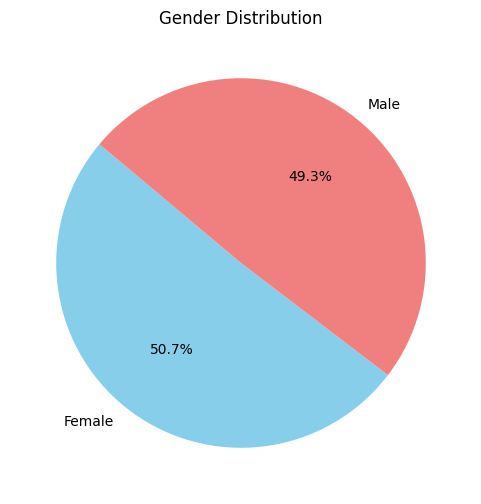

In [115]:
gender_counts = df['Sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140)
plt.title('Gender Distribution')
plt.show()

## ***⚡Display the top 10 job show***

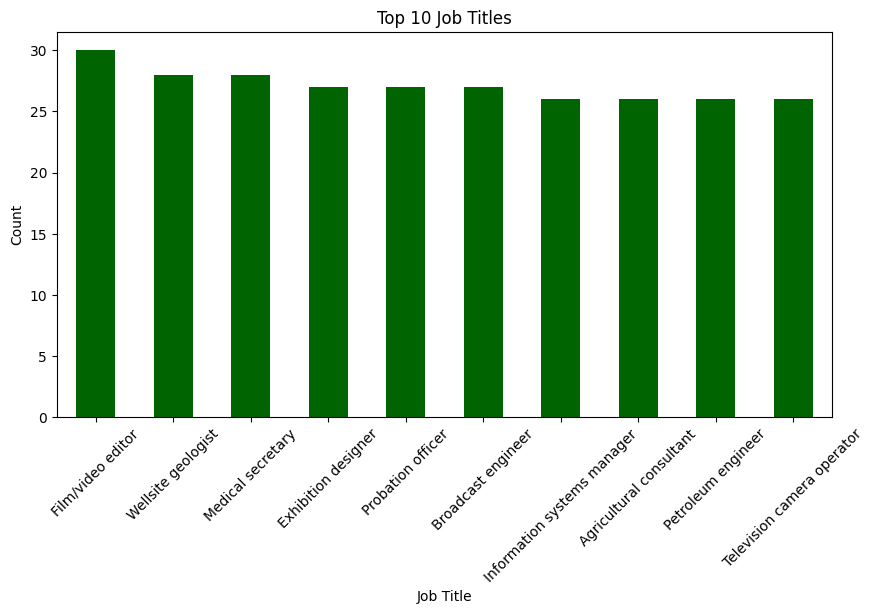

In [116]:
plt.figure(figsize=(10, 5))
df['Job Title'].value_counts().head(10).plot(kind='bar', color='darkgreen')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Top 10 Job Titles')
plt.xticks(rotation=45)
plt.show()

## ***⚡Histogram show***

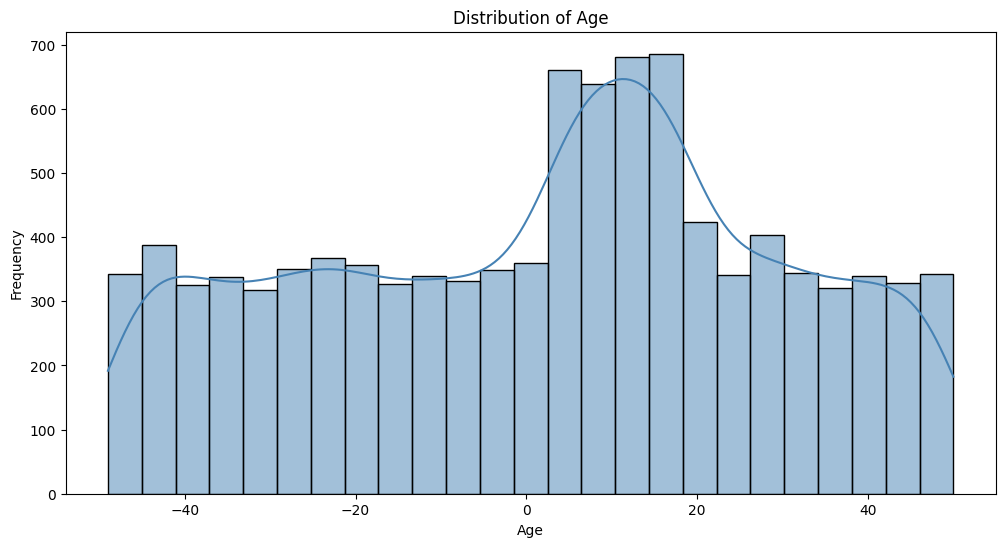

In [131]:
# Exploratory Data Analysis

plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True, color='steelblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## ***⚡countplot show***

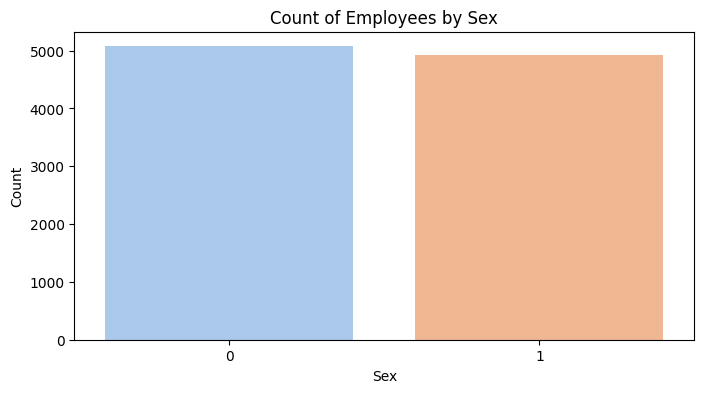

In [132]:
# Count plot for Sex
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Count of Employees by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

## ***⚡countplot show the job title***

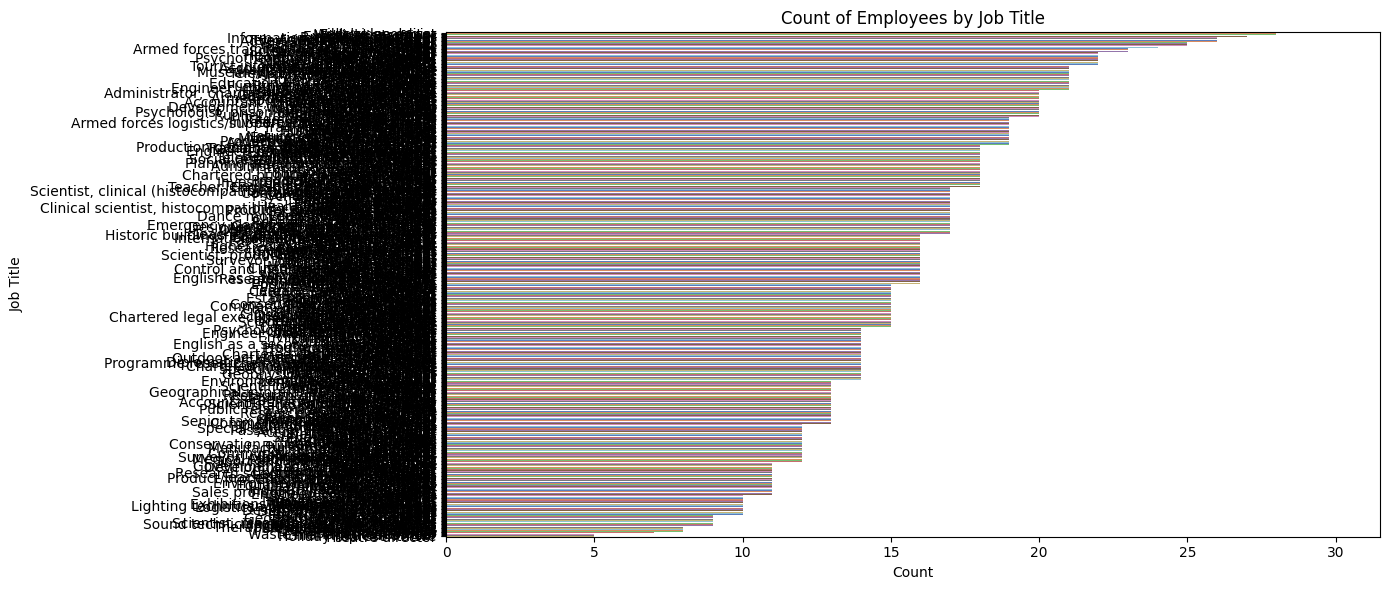

In [133]:
# Count plot for Job Title
plt.figure(figsize=(14, 6))
sns.countplot(data=df, y='Job Title', order=df['Job Title'].value_counts().index, palette='muted')
plt.title('Count of Employees by Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

## ***⚡Boxplot show***

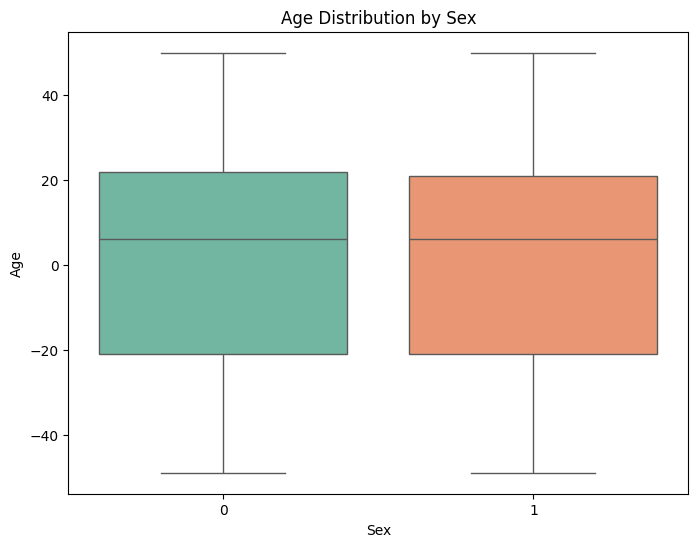

In [134]:
# Box plot: Age distribution by Sex
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sex', y='Age', palette='Set2')
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

## ***⚡pairplot show***

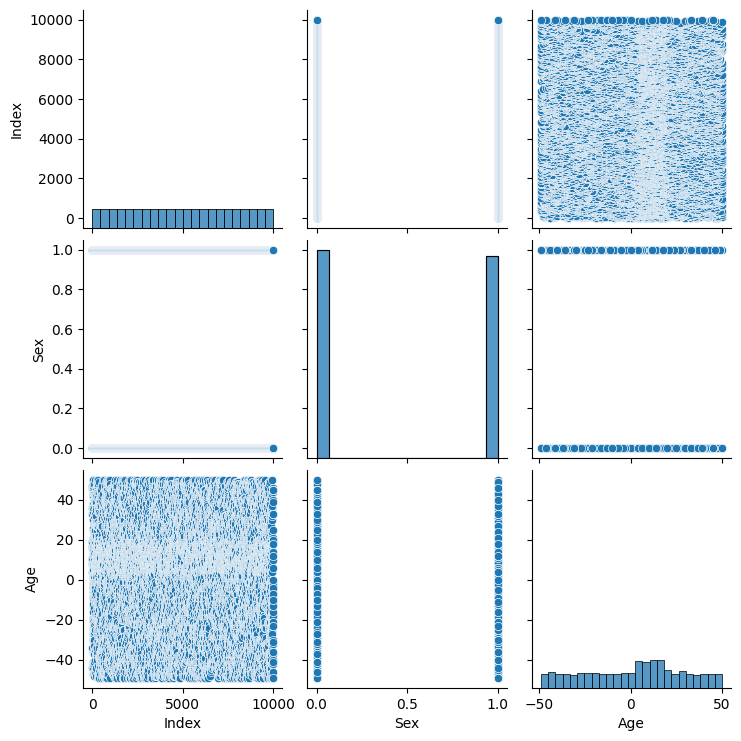

In [135]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 2:
    sns.pairplot(numeric_df)
    plt.show()


# ***⭐Feature Engineering & Encoding***

In [143]:
# Using LabelEncoder
label_encoders = {}  # Dictionary to store fitted encoders

# Check if the columns exist before applying LabelEncoder
columns_to_encode = ["Sex","Job Title","Marital Status"]
for col in columns_to_encode:
    if col in df.columns:  # Check if column exists
        le = LabelEncoder()  # Initialize LabelEncoder
        df[col] = le.fit_transform(df[col])  # Transform column
        label_encoders[col] = le  # Store the encoder for later use
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

df

,Index,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Age
0,1,Sara,Mcguire,0,tsharp@example.net,(971)643-6089x9160,2021-08-17,180,4
1,2,Alisha,Hebert,1,vincentgarrett@example.net,+1-114-355-1841x78347,2069-06-28,68,-44
2,3,Gwendolyn,Sheppard,1,mercadojonathan@example.com,9017807728,2015-09-25,315,10
3,4,Kristine,Mccann,0,lindsay55@example.com,+1-607-333-9911x59088,1978-07-27,387,47
4,5,Bobby,Pittman,0,blevinsmorgan@example.com,3739847538,1989-11-17,440,36
...,...,...,...,...,...,...,...,...,...
9995,9996,Tina,Sherman,1,bartlettcolleen@example.org,(455)476-4044x5755,2074-07-28,531,-49
9996,9997,Earl,Jennings,0,andreabenton@example.com,009.056.6505,2032-08-20,631,-7
9997,9998,Ellen,Dominguez,0,michaelayoder@example.net,409-428-4297x469,2066-06-06,338,-41
9998,9999,Emma,Clark,1,pstrickland@example.com,849-868-8653,2007-09-05,6,18


## ***⚡Correlation Heatmap (Only numerical features)***

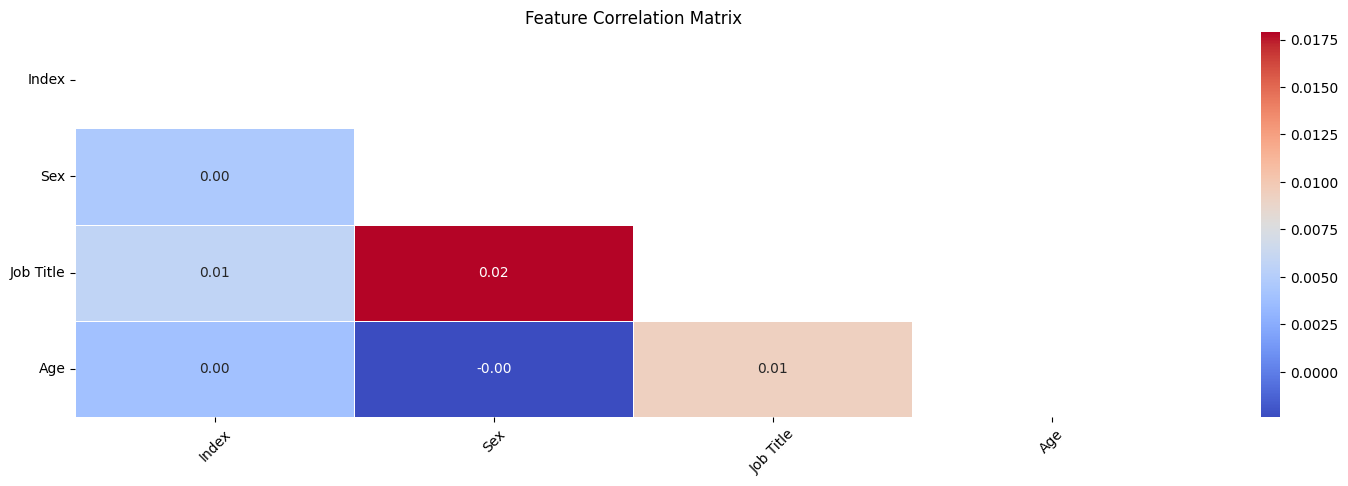

In [145]:
# Select only numerical features for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

# Lower triangle mask create karo
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(18, 5))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)  # X-axis labels readable banane ke liye
plt.yticks(rotation=0)
plt.show()

In [146]:
# Create a subset of the data with features and target
features = df[['Age', 'Job Title']].copy()
target = df['Sex'].copy()

# Encode the target variable (assuming two classes: 'Male' and 'Female')
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# One-hot encode the categorical predictor 'Job Title'
features_encoded = pd.get_dummies(features, columns=['Job Title'], drop_first=True)

In [151]:
# Standardize numerical features (recommended for models like SVM and KNN)
scaler = StandardScaler()
features_encoded[['Age']] = scaler.fit_transform(features_encoded[['Age']])

# ***⭐Data Splitting***

In [148]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.3, random_state=42, stratify=target_encoded)

# ***⭐Data Models***

In [149]:
# Define multiple ML algorithms
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [150]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    # Print classification report
    print(f"\n{name} - Classification Report:\n")
    # Fix: Convert le.classes_ to a list of strings
    print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))


Logistic Regression - Classification Report:

              precision    recall  f1-score   support

           0       0.49      0.56      0.52      1522
           1       0.47      0.41      0.44      1478

    accuracy                           0.48      3000
   macro avg       0.48      0.48      0.48      3000
weighted avg       0.48      0.48      0.48      3000


Random Forest - Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      1522
           1       0.48      0.45      0.47      1478

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000


Gradient Boosting - Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.92      0.66      1522
           1       0.50      0.08      0.14      1478

    accuracy                           0.51      